## Importación de librerías necesarias 

In [7]:
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [8]:
from read_data import read_scores_2y

In [9]:
path = r'C:\Users\emili\OneDrive\Documentos\nuclio_g3_bias\users\Emilio\compas-scores-two-years.csv'
df_scores_2y = read_scores_2y (path)

scores 2y shape: (7214, 53)


## Overview del dataframe df_scores_2y

In [10]:
from data_overview import check_df
check_df(df_scores_2y, '')

1. ¿CUANTAS FILAS Y COLUMNAS hay en el conjunto de datos?
	Hay 7,214 filas y 53 columnas.


2. ¿Cuáles son las PRIMERAS DOS FILAS del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1




3. ¿Cuáles son las ULTIMAS DOS FILAS del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,0,2,0,0,3,-1.0,2014-03-08 08:06:02,2014-03-09 12:18:04,14003308CF10A,2014-03-08,NaN,1.0,M,Battery on Law Enforc Officer,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,2,Low,2014-03-09,Risk of Violence,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
7213,11001,florencia sanmartin,florencia,sanmartin,2014-06-30,Female,1992-12-18,23,Less than 25,Hispanic,0,4,0,0,2,-2.0,2014-06-28 12:16:41,2014-06-30 11:19:23,14008895CF10A,2014-06-28,NaN,2.0,F,Possession of Ethylone,1,15008160TC10A,(M2),0.0,2015-03-15,Operating W/O Valid License,2015-03-15,2015-03-15,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2014-06-30,Risk of Violence,4,Low,2014-06-30,2015-03-15,2015-03-15,2,0,258,0,1




4. MUESTRA ALEATORIA de filas del conjunto de datos


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
6027,9201,donald jones,donald,jones,2014-08-06,Male,1992-01-25,24,Less than 25,African-American,0,2,0,1,1,-1.0,2014-08-05 08:19:29,2014-08-06 02:25:33,14010665CF10A,2014-08-05,NaN,1.0,F,Pos Cannabis W/Intent Sel/Del,1,15005606MM10A,(M2),0.0,2015-05-22,Susp Drivers Lic 1st Offense,2015-05-22,2015-05-29,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,2,Low,2014-08-06,Risk of Violence,3,Low,2014-08-06,2015-05-22,2015-05-29,1,0,289,1,1
6275,9574,gibrian wilson,gibrian,wilson,2013-04-25,Male,1976-08-22,39,25 - 45,African-American,0,5,0,0,9,0.0,2013-04-25 02:54:02,2013-04-25 08:07:19,13005941CF10A,2013-04-25,NaN,0.0,F,"Poss3,4 Methylenedioxymethcath",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,2013-04-25,Risk of Violence,1,Low,2013-04-25,2013-04-25,2013-04-25,9,0,1072,0,0
6971,10617,bruce burdin,bruce,burdin,2013-01-06,Male,1970-10-18,45,Greater than 45,Caucasian,0,1,0,0,4,-1.0,2013-01-05 02:05:58,2013-01-09 09:59:27,12072600TC30A,NaN,2013-01-04,2.0,M,arrest case no charge,1,14026277TC10A,(M2),0.0,2014-07-04,Operating W/O Valid License,2014-07-04,2014-07-05,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-01-06,Risk of Violence,1,Low,2013-01-06,2014-07-04,2014-07-05,4,3,544,1,1
147,227,linda etienne,linda,etienne,2014-10-23,Female,1985-01-04,31,25 - 45,African-American,0,3,0,0,0,-1.0,2014-10-22 11:17:38,2014-10-24 06:08:10,14014216CF10A,2014-10-22,NaN,1.0,F,Possession of Oxycodone,1,15015591TC20A,(M2),39.0,2015-02-20,Unlaw LicTag/Sticker Attach,2015-03-31,2015-05-07,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-10-23,Risk of Violence,2,Low,2014-10-23,2015-01-07,2015-02-11,0,1,76,0,1
1337,2057,christopher denis,christopher,denis,2013-03-14,Male,1991-01-15,25,25 - 45,African-American,0,9,3,1,15,-1.0,2013-03-13 05:33:27,2013-03-15 05:42:00,13003713CF10A,2013-03-13,NaN,1.0,F,"Poss3,4 Methylenedioxymethcath",1,14004265CF10A,(F1),NaN,2013-08-08,Aggrav Child Abuse-Agg Battery,NaN,NaN,NaN,1,14004265CF10A,(F1),2013-08-08,Aggrav Child Abuse-Agg Battery,Risk of Recidivism,9,High,2013-03-14,Risk of Violence,7,Medium,2013-03-14,2013-03-13,2013-03-15,15,1,147,1,1




5. ¿Cuáles son las COLUMNAS del conjunto de datos?
	 - id
	 - name
	 - first
	 - last
	 - compas_screening_date
	 - sex
	 - dob
	 - age
	 - age_cat
	 - race
	 - juv_fel_count
	 - decile_score
	 - juv_misd_count
	 - juv_other_count
	 - priors_count
	 - days_b_screening_arrest
	 - c_jail_in
	 - c_jail_out
	 - c_case_number
	 - c_offense_date
	 - c_arrest_date
	 - c_days_from_compas
	 - c_charge_degree
	 - c_charge_desc
	 - is_recid
	 - r_case_number
	 - r_charge_degree
	 - r_days_from_arrest
	 - r_offense_date
	 - r_charge_desc
	 - r_jail_in
	 - r_jail_out
	 - violent_recid
	 - is_violent_recid
	 - vr_case_number
	 - vr_charge_degree
	 - vr_offense_date
	 - vr_charge_desc
	 - type_of_assessment
	 - decile_score.1
	 - score_text
	 - screening_date
	 - v_type_of_assessment
	 - v_decile_score
	 - v_score_text
	 - v_screening_date
	 - in_custody
	 - out_custody
	 - priors_count.1
	 - start
	 - end
	 - event
	 - two_year_recid


6. ¿Cuál es el TIPO DE DATOS de cada columna?
id              

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
count,7214.0,7214,7214,7214,7214,7214,7214,7214.0,7214,7214,7214.0,7214.0,7214.0,7214.0,7214.0,6907.0,6907,6907,7192,6055,1137,7192.0,7214,7185,7214.0,3471,3471,2316.0,3471,3413,2316,2316,0.0,7214.0,819,819,819,819,7214,7214.0,7214,7214,7214,7214.0,7214,7214,6978,6978,7214.0,7214.0,7214.0,7214.0,7214.0
unique,,7158,2800,3950,690,2,5452,,3,6,,,,,,,6907,6880,7192,927,580,,2,437,,3471,10,,1075,340,972,938,,,819,9,570,83,1,,3,690,1,,3,690,1156,1169,,,,,
top,,anthony smith,michael,williams,2013-02-20,Male,1987-12-21,,25 - 45,African-American,,,,,,,2013-08-13 06:03:42,2013-09-12 10:31:00,13011352CF10A,2013-01-14,2013-02-06,,F,Battery,,13009779CF10A,(M1),,2014-12-08,Driving License Suspended,2014-05-27,2015-05-15,,,13009779CF10A,(M1),2015-08-15,Battery,Risk of Recidivism,,Low,2013-02-20,Risk of Violence,,Low,2013-02-20,2014-01-04,2020-01-01,,,,,
freq,,3,149,83,32,5819,5,,4109,3696,,,,,,,1,3,1,26,9,,4666,1156,,1,1201,,12,258,9,9,,,1,344,6,329,7214,,3897,32,7214,,4761,32,20,61,,,,,
mean,5501.255753,,,,,,,34.817993,,,0.06723,4.509565,0.090934,0.109371,3.472415,3.304763,,,,,,57.731368,,,0.481148,,,20.26943,,,,,,0.113529,,,,,,4.509565,,,,3.691849,,,,,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.70687,,,,,,,11.888922,,,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,,,,,,329.740215,,,0.499679,,,74.871668,,,,,,0.317261,,,,,,2.856396,,,,2.510148,,,,,4.882538,46.954563,399.020583,0.48612,0.497593
min,1.0,,,,,,,18.0,,,0.0,1.0,0.0,0.0,0.0,-414.0,,,,,,0.0,,,0.0,,,-1.0,,,,,,0.0,,,,,,1.0,,,,1.0,,,,,0.0,0.0,0.0,0.0,0.0
25%,2735.25,,,,,,,25.0,,,0.0,2.0,0.0,0.0,0.0,-1.0,,,,,,1.0,,,0.0,,,0.0,,,,,,0.0,,,,,,2.0,,,,1.0,,,,,0.0,0.0,148.25,0.0,0.0
50%,5509.5,,,,,,,31.0,,,0.0,4.0,0.0,0.0,2.0,-1.0,,,,,,1.0,,,0.0,,,0.0,,,,,,0.0,,,,,,4.0,,,,3.0,,,,,2.0,0.0,530.5,0.0,0.0
75%,8246.5,,,,,,,42.0,,,0.0,7.0,0.0,0.0,5.0,0.0,,,,,,2.0,,,1.0,,,1.0,,,,,,0.0,,,,,,7.0,,,,5.0,,,,,5.0,1.0,914.0,1.0,1.0




11. ¿VALORES NULOS EN EL DATASET?
violent_recid              7214
vr_charge_degree           6395
vr_case_number             6395
vr_offense_date            6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_case_number              3743
r_charge_degree            3743
c_offense_date             1159
c_jail_out                  307
days_b_screening_arrest     307
c_jail_in                   307
out_custody                 236
in_custody                  236
c_charge_desc                29
c_days_from_compas           22
c_case_number                22
v_type_of_assessment          0
type_of_assessment            0
decile_score.1                0
v_decile_score                0
v_score_text                  0
v_screening_date              0
screening_date                0
priors_count.1                0
star

## 4. Tratamiento de Nulos

In [12]:
#Columnas a eliminar del dataset por volúmen de nulos

columns_to_drop = ['violent_recid', 'vr_charge_degree', 'vr_case_number', 'vr_offense_date', 'vr_charge_desc', 'c_arrest_date', 'r_jail_out', 
                   'r_days_from_arrest', 'r_charge_desc', 'r_offense_date', 'r_case_number', 'r_charge_degree', 'c_offense_date', 'days']

df_scores_2y = df_scores_2y.drop(columns=columns_to_drop)

## 5. Tratamiento de Duplicados

In [13]:
# No existen registros duplicados
num_duplicados = df_scores_2y.duplicated().sum()
num_duplicados

0

## 6. Tratamiento de Tipos

In [14]:
df_scores_2y.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_jail_in', 'is_violent_recid', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date', 'v_type_of_assessment',
       'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody',
       'out_custody', 'priors_count.1', 'start', 'end', 'event',
       'two_year_recid'],
      dtype='object')

In [15]:
# Convertir columnas de fecha a formato datetime
df_scores_2y['compas_screening_date'] = pd.to_datetime(df_scores_2y['compas_screening_date'], errors='coerce')
df_scores_2y['dob'] = pd.to_datetime(df_scores_2y['dob'], errors='coerce')
df_scores_2y['screening_date'] = pd.to_datetime(df_scores_2y['screening_date'], errors='coerce')
df_scores_2y['v_screening_date'] = pd.to_datetime(df_scores_2y['v_screening_date'], errors='coerce')

In [20]:
df_scores_2y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7214 non-null   int64         
 1   name                     7214 non-null   object        
 2   first                    7214 non-null   object        
 3   last                     7214 non-null   object        
 4   compas_screening_date    7214 non-null   datetime64[ns]
 5   sex                      7214 non-null   object        
 6   dob                      7214 non-null   datetime64[ns]
 7   age                      7214 non-null   int64         
 8   age_cat                  7214 non-null   object        
 9   race                     7214 non-null   object        
 10  juv_fel_count            7214 non-null   int64         
 11  decile_score             7214 non-null   int64         
 12  juv_misd_count           7214 non-

## 7. Normalización de Categorías

In [21]:
df_scores_2y['race'].unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

In [23]:
df_scores_2y['age_cat'].unique()

array(['Greater than 45', '25 - 45', 'Less than 25'], dtype=object)

In [24]:
df_scores_2y['sex'].unique()

array(['Male', 'Female'], dtype=object)

## 8. Eliminación de columnas

In [ ]:
# Yo no eliminaría columnas, salvo las eliminadas por motivo de volúmen de nulos

## 9. Eliminación de registros (filas)


In [ ]:
# Yo no eliminaría registros

## 10. ANALISIS EDA


### 10.1 ANALISIS UNIVARIABLE


#### 10.1.1 GENERO

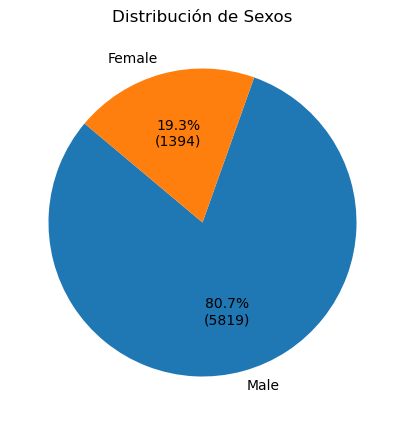

In [38]:
conteo_sex = df_scores_2y['sex'].value_counts()
# Función para mostrar cantidad y porcentaje
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(5, 5))
plt.pie(conteo_sex, labels=conteo_sex.index, autopct=lambda pct: func(pct, conteo_sex), startangle=140)

plt.title('Distribución de Sexos')

plt.show()


#### 10.1.2 RAZA

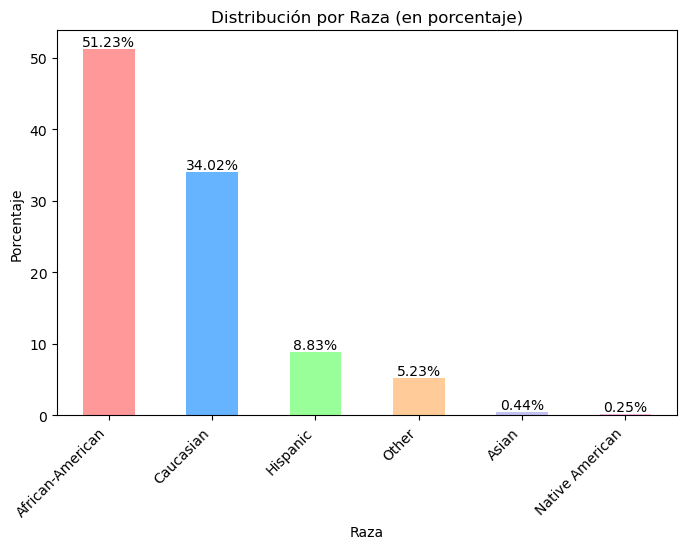

In [43]:
conteo_race = df_scores_2y['race'].value_counts()
porcentaje_race = conteo_race / conteo_race.sum() * 100
plt.figure(figsize=(8, 5))
bars = porcentaje_race.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

plt.title('Distribución por Raza (en porcentaje)')
plt.xlabel('Raza')
plt.ylabel('Porcentaje')

plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}%', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')

plt.show()

#### 10.1.3 CATEGORÍA DE EDAD

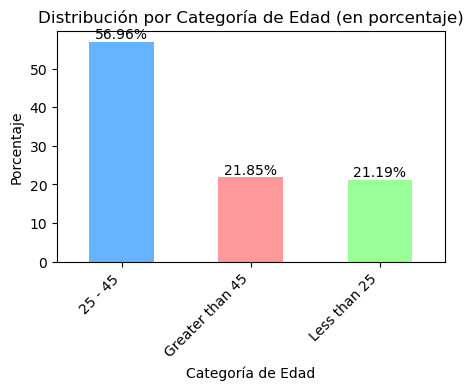

In [36]:
conteo_age_cat = df_scores_2y['age_cat'].value_counts()

porcentaje_age_cat = conteo_age_cat / conteo_age_cat.sum() * 100
plt.figure(figsize=(5, 3))
bars = porcentaje_age_cat.plot(kind='bar', color=['#66b3ff', '#ff9999', '#99ff99'])

plt.title('Distribución por Categoría de Edad (en porcentaje)')
plt.xlabel('Categoría de Edad')
plt.ylabel('Porcentaje')

plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}%', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')


plt.show()

#### 10.1.4 REINCIDENCIA DOS AÑOS

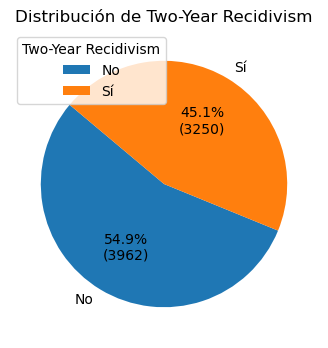

In [45]:
conteo_reincidencia = df_scores_2y['two_year_recid'].value_counts()
etiquetas = ['No', 'Sí']

def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(4, 4))
plt.pie(conteo_reincidencia, labels=etiquetas, autopct=lambda pct: func(pct, conteo_reincidencia), startangle=140)

plt.legend(etiquetas, title="Two-Year Recidivism")

plt.title('Distribución de Two-Year Recidivism')

plt.show()

#### 10.1.4 DECILE SCORE

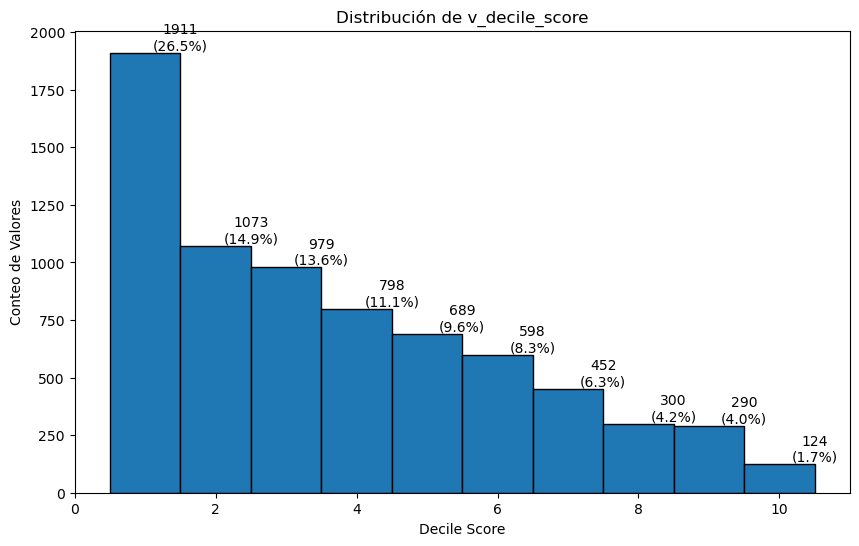

In [46]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_scores_2y['v_decile_score'], bins=range(1, 12), edgecolor='black', align='left')

# Calcular el porcentaje y el conteo de valores
for i in range(len(patches)):
    porcentaje = (n[i] / n.sum()) * 100
    plt.text(bins[i] + 0.5, n[i], f'{int(n[i])}\n({porcentaje:.1f}%)', ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de v_decile_score')
plt.xlabel('Decile Score')
plt.ylabel('Conteo de Valores')

# Mostrar el gráfico
plt.show()

#### 10.1.5 CATEGORÍA DE NIVEL DE RIESGO

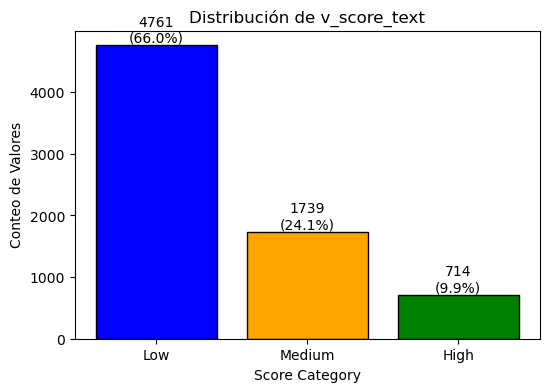

In [50]:
conteo_scores = df_scores_2y['v_score_text'].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(conteo_scores.index, conteo_scores, color=['blue', 'orange', 'green'], edgecolor='black')

# Añadir el conteo y porcentaje sobre las barras
for bar in bars:
    yval = bar.get_height()
    porcentaje = (yval / conteo_scores.sum()) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}\n({porcentaje:.1f}%)', ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de v_score_text')
plt.xlabel('Score Category')
plt.ylabel('Conteo de Valores')

plt.show()

### 10.2 ANALISIS BIVARIABLE


#### 10.2.1 DECILE SCORE POR RAZA

In [54]:
medianas = df_scores_2y.groupby('race')['v_decile_score'].median().sort_values(ascending=False)

# Ordenar la columna 'race' del DataFrame según la mediana calculada
df_scores_2y['race'] = pd.Categorical(df_scores_2y['race'], categories=medianas.index, ordered=True)
fig = px.box(df_scores_2y, x='race', y='v_decile_score', color='race', 
             category_orders={'race': medianas.index},
             title='Distribución de v_decile_score por Raza (Ordenado por Mediana)')

# Mostrar el gráfico
fig.show()

#### 10.2.1 DECILE SCORE POR GENERO

In [55]:
medianas = df_scores_2y.groupby('sex')['v_decile_score'].median().sort_values(ascending=False)

# Ordenar la columna 'sex' del DataFrame según la mediana calculada
df_scores_2y['sex'] = pd.Categorical(df_scores_2y['sex'], categories=medianas.index, ordered=True)
fig = px.box(df_scores_2y, x='sex', y='v_decile_score', color='sex', 
             category_orders={'sex': medianas.index},
             title='Distribución de v_decile_score por Sexo (Ordenado por Mediana)')

# Mostrar el gráfico
fig.show()